# Analyse the results

## Define data directory

A top level directory to store all the data for this experiment

In [1]:
dataDirName = '/home/yram0006/phd/chapter_2/workspace/mortality_data/imbalance_experiment/'

## Function to extract lists

In [2]:
def getLists(d):
    labels = []
    accuracy_scores = []
    balanced_accuracy_scores = []
    average_precision_scores = []
    f1_scores = []
    roc_auc_scores = []
    mccf1_scores = []

    for label, scores in d.items():
        labels.append(label)
        for key, value in scores.items():
            if key == 'test_accuracy':
                accuracy_scores.append(value)
            if key == 'test_balanced_accuracy':
                balanced_accuracy_scores.append(value)
            if key == 'test_average_precision':
                average_precision_scores.append(value)
            if key == 'test_f1':
                f1_scores.append(value)
            if key == 'test_roc_auc':
                roc_auc_scores.append(value)
            if key == 'test_mccf1_score':
                mccf1_scores.append(value)
    return labels, accuracy_scores, balanced_accuracy_scores, average_precision_scores, f1_scores, roc_auc_scores, mccf1_scores


## Box plot

### Create box plot dataframe

In [3]:
import pickle
from pathlib import Path
import pandas as pd


data = []

for n in ['50_50', '65_35', '70_30', '75_25', '80_20', '85_15', '90_10', '95_5']:
    scoresFile = Path(dataDirName, str(n) + '_samples_icd_vb_0_va_72_lb_0_la_72', 'cv_scores_ts_0_te_7.pickle')
    scoresDict = {}
    with open(Path(scoresFile), 'rb') as fp:
        scoresDict = pickle.load(fp)
    labels, accuracy_scores, balanced_accuracy_scores, average_precision_scores, f1_scores, roc_auc_scores, mccf1_scores = getLists(scoresDict)
    for i in range(len(labels)):
        for raw_roc_auc_score in roc_auc_scores[i]:
            data.append([labels[i], n, raw_roc_auc_score])
boxPlotDf = pd.DataFrame(data, columns=['Model', 'Proportion', 'AUROC Score'])

### Plot

/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: Fut

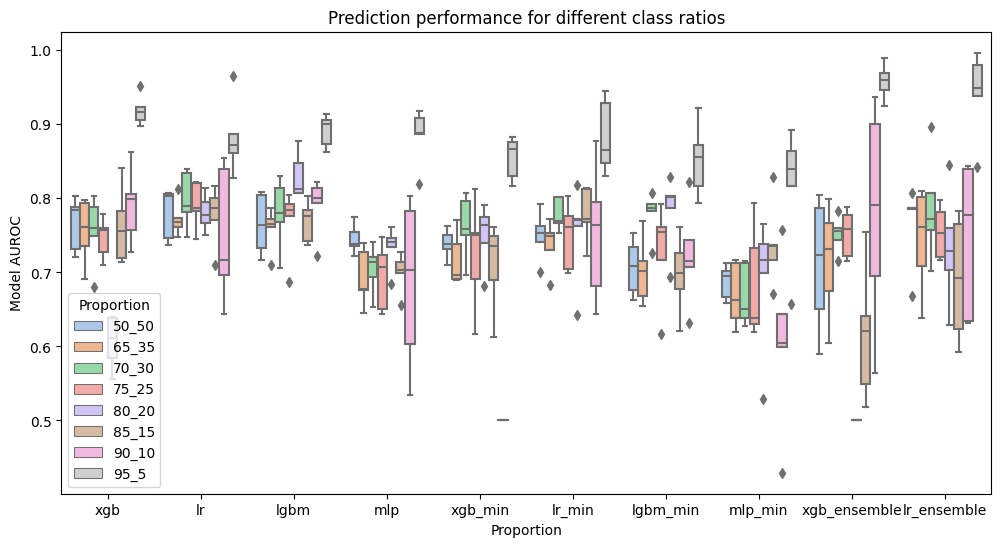

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,6))
ax = sns.boxplot(data=boxPlotDf, x='Model', y='AUROC Score', hue='Proportion', palette=sns.color_palette("pastel"))
ax.set(xlabel='Proportion')
ax.set(ylabel='Model AUROC')
ax.set_title('Prediction performance for different class ratios')
plt.show()

## Line plot

### Create AUROC line plot dataframe

In [5]:
import os
import pickle
from pathlib import Path
import pandas as pd


data = []

for n in ['50_50', '65_35', '70_30', '75_25', '80_20', '85_15', '90_10', '95_5']:
    scoresFile = Path(dataDirName, str(n) + '_samples_icd_vb_0_va_72_lb_0_la_72', 'cv_scores_ts_0_te_7.pickle')
    scoresDict = {}
    with open(Path(scoresFile), 'rb') as fp:
        scoresDict = pickle.load(fp)
    labels, accuracy_scores, balanced_accuracy_scores, average_precision_scores, f1_scores, roc_auc_scores, mccf1_scores = getLists(scoresDict)
    for i in range(len(labels)):
        data.append([labels[i], n, roc_auc_scores[i].mean()])
aurocLinePlotDf = pd.DataFrame(data, columns=['Model', 'Proportion', 'Average AUROC Score'])

In [6]:
aurocLinePlotDf = aurocLinePlotDf[aurocLinePlotDf.Model.isin(['xgb', 'lr', 'xgb_ensemble', 'lr_ensemble'])]

### Plot

/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: Fut

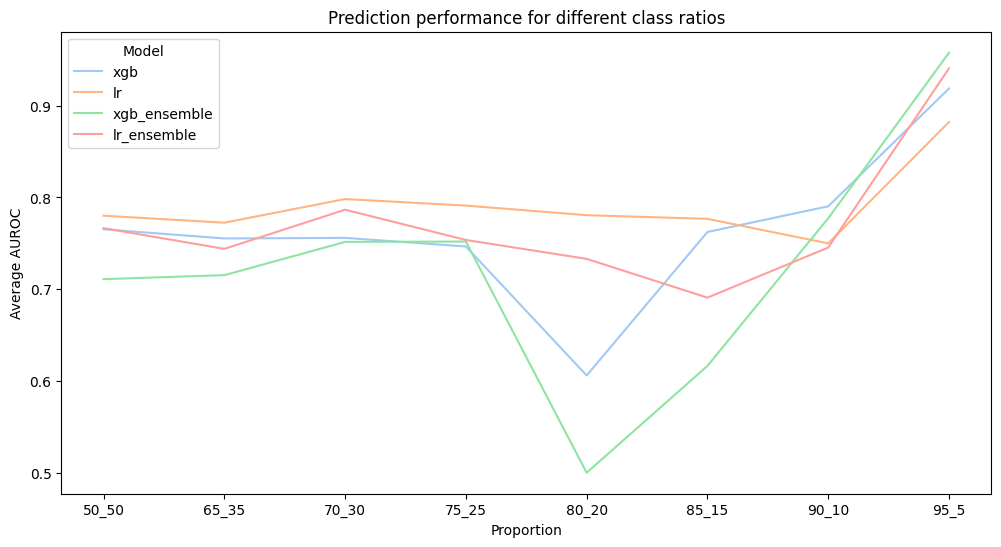

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,6))
ax = sns.lineplot(data=aurocLinePlotDf, x='Proportion', y='Average AUROC Score', hue='Model', palette=sns.color_palette("pastel"))
ax.set(xlabel='Proportion')
ax.set(ylabel='Average AUROC')
ax.set_title('Prediction performance for different class ratios')
plt.show()

In [8]:
aurocLinePlotDf.Proportion = aurocLinePlotDf.Proportion.apply(lambda x: int(x.split('_')[0]))

/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Figure size 1200x600 with 0 Axes>

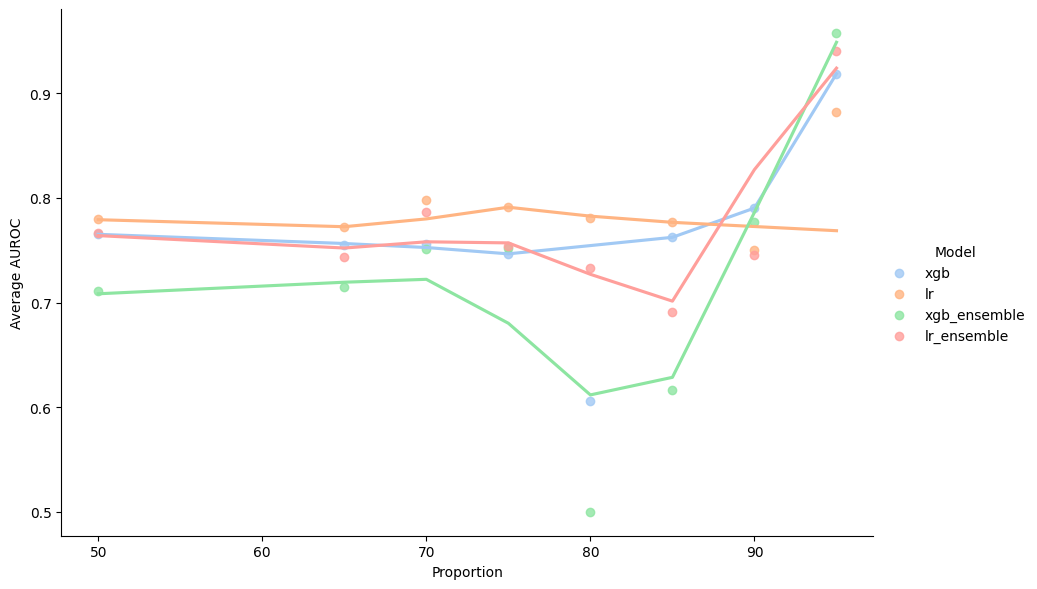

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,6))
ax = sns.lmplot(
    data=aurocLinePlotDf,
    x='Proportion',
    y='Average AUROC Score',
    hue='Model',
    palette=sns.color_palette("pastel"),
    height=6,
    aspect=1.5,
    lowess=True,
    # robust=True,
    )
ax.set(xlabel='Proportion')
ax.set(ylabel='Average AUROC')
plt.show()


### Create MCCF1 line plot

In [10]:
import os
import pickle
from pathlib import Path
import pandas as pd


data = []

for n in ['50_50', '65_35', '70_30', '75_25', '80_20', '85_15', '90_10', '95_5']:
    scoresFile = Path(dataDirName, str(n) + '_samples_icd_vb_0_va_72_lb_0_la_72', 'cv_scores_ts_0_te_7.pickle')
    scoresDict = {}
    with open(Path(scoresFile), 'rb') as fp:
        scoresDict = pickle.load(fp)
    labels, accuracy_scores, balanced_accuracy_scores, average_precision_scores, f1_scores, roc_auc_scores, mccf1_scores = getLists(scoresDict)
    for i in range(len(labels)):
        data.append([labels[i], n, mccf1_scores[i].mean()])
mccf1LinePlotDf = pd.DataFrame(data, columns=['Model', 'Proportion', 'Average MCCF1 Score'])

In [11]:
mccf1LinePlotDf = mccf1LinePlotDf[mccf1LinePlotDf.Model.isin(['xgb', 'lr', 'xgb_ensemble', 'lr_ensemble'])]

/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: Fut

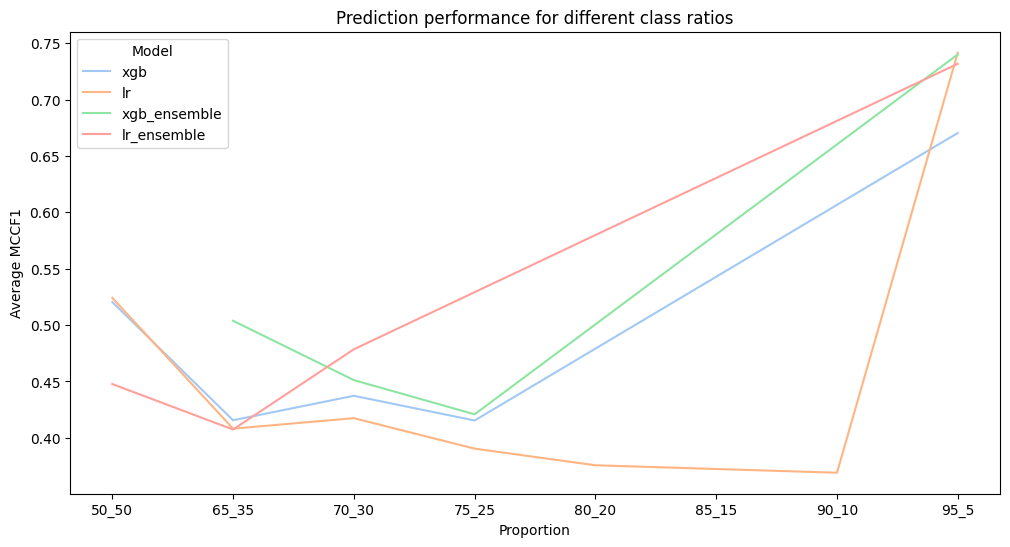

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,6))
ax = sns.lineplot(data=mccf1LinePlotDf, x='Proportion', y='Average MCCF1 Score', hue='Model', palette=sns.color_palette("pastel"))
ax.set(xlabel='Proportion')
ax.set(ylabel='Average MCCF1')
ax.set_title('Prediction performance for different class ratios')
plt.show()

In [13]:
mccf1LinePlotDf.Proportion = mccf1LinePlotDf.Proportion.apply(lambda x: int(x.split('_')[0]))

/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Figure size 1200x600 with 0 Axes>

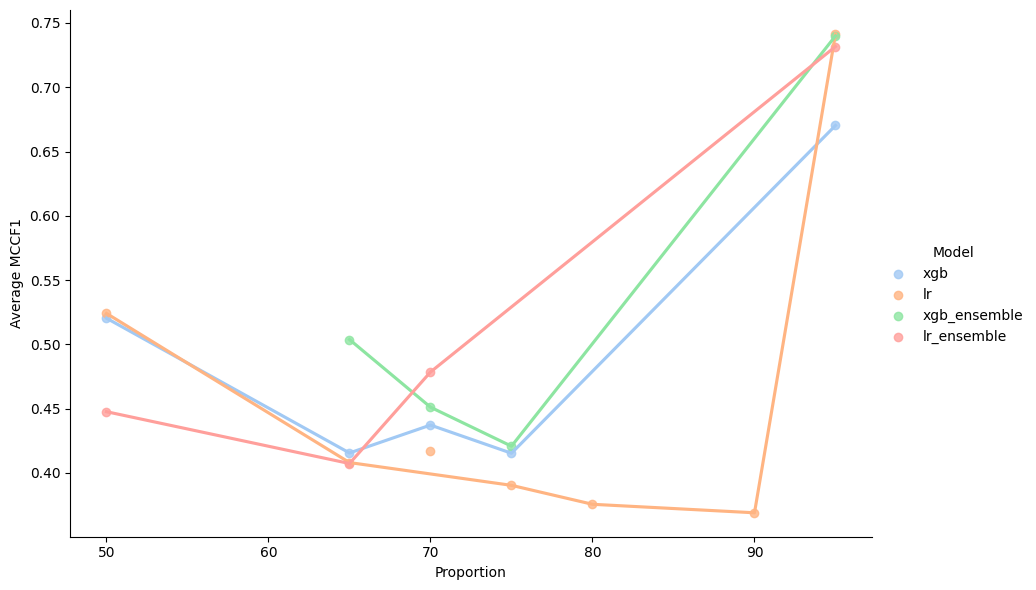

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,6))
ax = sns.lmplot(
    data=mccf1LinePlotDf,
    x='Proportion',
    y='Average MCCF1 Score',
    hue='Model',
    palette=sns.color_palette("pastel"),
    height=6,
    aspect=1.5,
    lowess=True,
    # robust=True,
    )
ax.set(xlabel='Proportion')
ax.set(ylabel='Average MCCF1')
plt.show()


### Create Average Precision line plot

In [15]:
import os
import pickle
from pathlib import Path
import pandas as pd


data = []

for n in ['50_50', '65_35', '70_30', '75_25', '80_20', '85_15', '90_10', '95_5']:
    scoresFile = Path(dataDirName, str(n) + '_samples_icd_vb_0_va_72_lb_0_la_72', 'cv_scores_ts_0_te_7.pickle')
    scoresDict = {}
    with open(Path(scoresFile), 'rb') as fp:
        scoresDict = pickle.load(fp)
    labels, accuracy_scores, balanced_accuracy_scores, average_precision_scores, f1_scores, roc_auc_scores, mccf1_scores = getLists(scoresDict)
    for i in range(len(labels)):
        data.append([labels[i], n, average_precision_scores[i].mean()])
precisionLinePlotDf = pd.DataFrame(data, columns=['Model', 'Proportion', 'Average Precision Score'])

In [16]:
precisionLinePlotDf = precisionLinePlotDf[precisionLinePlotDf.Model.isin(['xgb', 'lr', 'xgb_ensemble', 'lr_ensemble'])]

/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: Fut

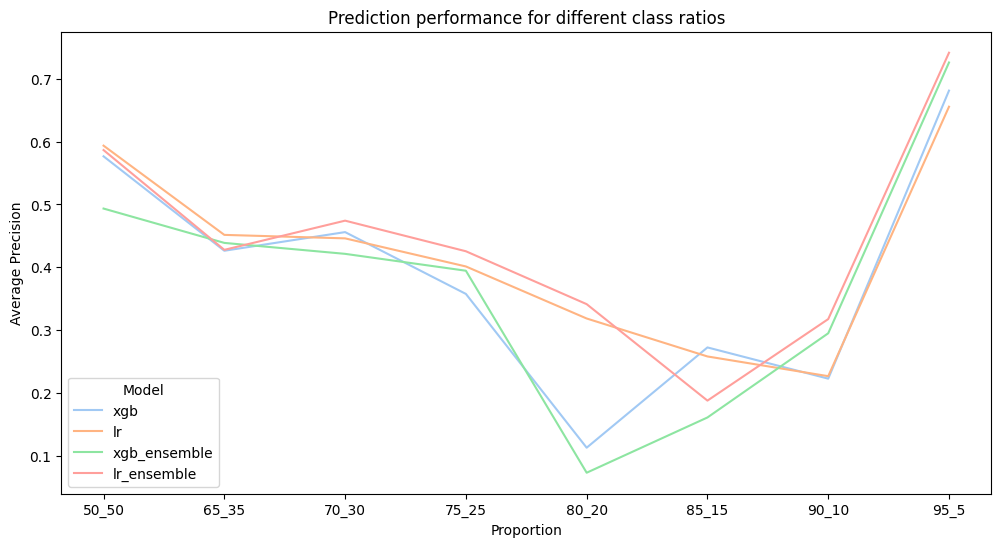

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,6))
ax = sns.lineplot(data=precisionLinePlotDf, x='Proportion', y='Average Precision Score', hue='Model', palette=sns.color_palette("pastel"))
ax.set(xlabel='Proportion')
ax.set(ylabel='Average Precision')
ax.set_title('Prediction performance for different class ratios')
plt.show()